# Exchange Rates Between the Canadian Dollar and the Euro

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The focus of the project will be on examining the exchange rate between the Euro and the Canadian dollar during Steven Harpers / Justin Trudeau's time as prime minister.

The dataset can be found here
https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020


In [1]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

In [3]:
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Early analysis of the dataset shows that there are 5 rows and 41 columns. There are no null values within this dataset. The columns mainly consist of the object data type except for **Iceland krona**, **Romanian leu**, and **Turkish lira** which are floats.

Before we start creating data visualizations, we'll need to do a bit of data cleaning. 

Our focus will be on the exchange rate between the euro and the Canadian dollar. 

# Data Cleaning

In [4]:
exchange_rates.rename(columns={'[Canadian dollar ]': 'can_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_can_dollar = exchange_rates[['Time', 'can_dollar']].copy()
exchange_rates['can_dollar'].value_counts() #62 '-'

-         62
1.5601     8
1.4023     8
1.4063     8
1.4097     7
          ..
1.4156     1
1.2949     1
1.5884     1
1.4807     1
1.6636     1
Name: can_dollar, Length: 2931, dtype: int64

In [6]:
euro_to_can_dollar = euro_to_can_dollar[euro_to_can_dollar['can_dollar'] != '-']
euro_to_can_dollar['can_dollar'] = euro_to_can_dollar['can_dollar'].astype(float)
euro_to_can_dollar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        5637 non-null   datetime64[ns]
 1   can_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


Above we cleaned the dataset along with changing the data type to a float so it is easier to analyze. 

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate over a long period.

# Rolling Mean

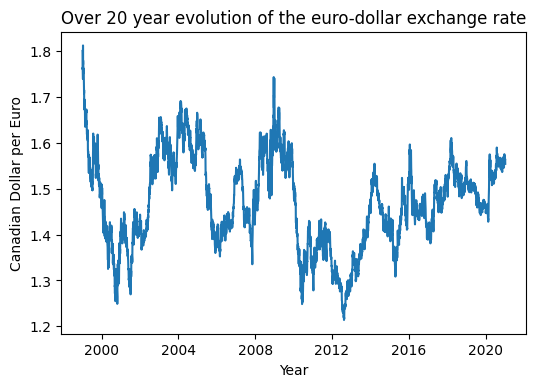

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(euro_to_can_dollar['Time'],
         euro_to_can_dollar['can_dollar'])
plt.title('Over 20 year evolution of the euro-dollar exchange rate')
plt.xlabel('Year')
plt.ylabel('Canadian Dollar per Euro')
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning, they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years). 

In this analysis we don't want the daily variation on our graph. Therfore in order to hide it and show only long-term trends, we can use the rolling mean/moving average. 

In [8]:
euro_to_can_dollar['rolling_mean'] = euro_to_can_dollar['can_dollar'].rolling(30).mean()

# #Data Analysis

In [9]:
Harper_Trudeau = euro_to_can_dollar.copy(
                   )[(euro_to_can_dollar['Time'].dt.year >= 2003) & (euro_to_can_dollar['Time'].dt.year < 2021)]
Harper = Harper_Trudeau.copy(
       )[(Harper_Trudeau['Time'].dt.year >= 2006) & (Harper_Trudeau['Time'].dt.year < 2015)]
Trudeau = Harper_Trudeau.copy(
       )[(Harper_Trudeau['Time'].dt.year >= 2015) & (_Harper_Trudeau['Time'].dt.year < 2021)]

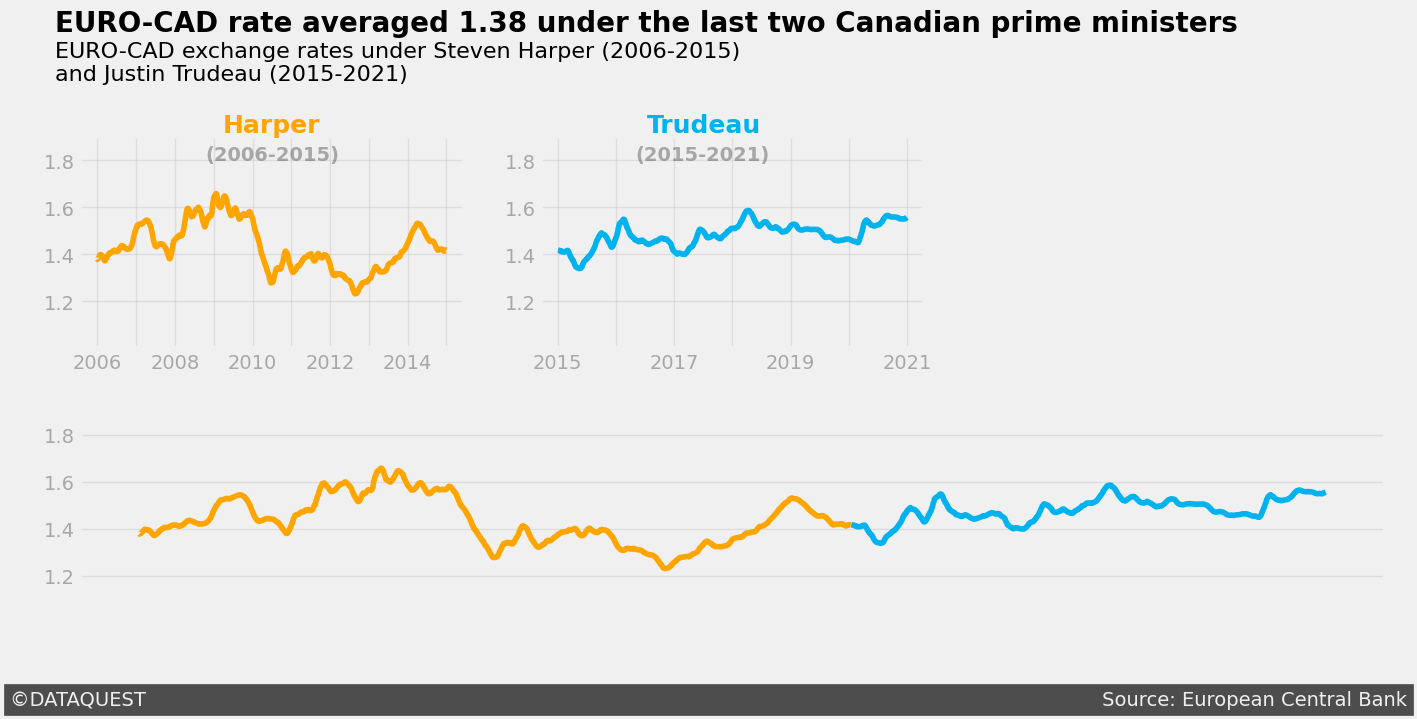

In [84]:
import matplotlib.style as style
## Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]

plt.subplots_adjust(hspace=0.3)

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(1.0, 1.9 )
    ax.set_yticks([1.2, 1.4, 1.6, 1.8])
    ax.set_yticklabels(['1.2', '1.4','1.6', '1.8'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    
### Ax1: Harper
ax1.plot(Harper['Time'], Harper['rolling_mean'],
        color='#ffa500')
ax1.set_xticklabels(['', '2006', '', '2008', '', '2010', '',
                     '2012', '', '2014', ''],
                   alpha=0.3)
ax1.text(733488.0, 1.92, 'Harper', fontsize=18, weight='bold',
        color='#ffa500')
ax1.text(733328.0, 1.8, '(2006-2015)', weight='bold',
         alpha=0.3)


### Ax2: Trudeau
ax2.plot(Trudeau['Time'], Trudeau['rolling_mean'],
        color='#00B2EE')
ax2.set_xticklabels(['', '2015', '', '2017', '', '2019',
                     '', '2021'],
                   alpha=0.3)
ax2.text(736155.0, 1.92, 'Trudeau', fontsize=18, weight='bold',
        color='#00B2EE')
ax2.text(736085.0, 1.8, '(2015-2021)', weight='bold',
         alpha=0.3)

### Ax4: Martin-Harper-Trudeau
ax3.plot(Harper['Time'], Harper['rolling_mean'],
        color='#ffa500')
ax3.plot(Trudeau['Time'], Trudeau['rolling_mean'],
        color='#00B2EE')
ax3.grid(alpha=0.5)
ax3.set_xticks([])

### Adding a title and a subtitle
ax1.text(731916.0, 2.35, 'EURO-CAD rate averaged 1.38 under the last two Canadian prime ministers',
         fontsize=20, weight='bold')
ax1.text(731916.0, 2.14, '''EURO-CAD exchange rates under Steven Harper (2006-2015)
and Justin Trudeau (2015-2021)''',
        fontsize=16)

### Adding a signature
ax3.text(731716.0, 0.65, '©DATAQUEST' + ' '*153 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()